In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from utils import dibuja_covar

plt.style.use('ggplot')

In [40]:
# Cargamos los datos
precios_df = pd.read_csv('../data/precios_1.csv', index_col=0, parse_dates=True)

In [41]:
precios_df.head(2)

,Activo_1,Activo_2,Activo_3,Activo_4,Activo_5,Activo_6,Activo_7
2010-01-04,77.056232,81.677033,102.487051,98.796395,100.824610,89.825127,110.691211
2010-01-05,78.382787,80.418470,102.588313,98.861627,100.749901,89.692984,111.317387


In [42]:
precios_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1000 entries, 2010-01-04 to 2013-12-20
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Activo_1  1000 non-null   float64
 1   Activo_2  1000 non-null   float64
 2   Activo_3  1000 non-null   float64
 3   Activo_4  1000 non-null   float64
 4   Activo_5  1000 non-null   float64
 5   Activo_6  1000 non-null   float64
 6   Activo_7  1000 non-null   float64
dtypes: float64(7)
memory usage: 62.5 KB


<Axes: >

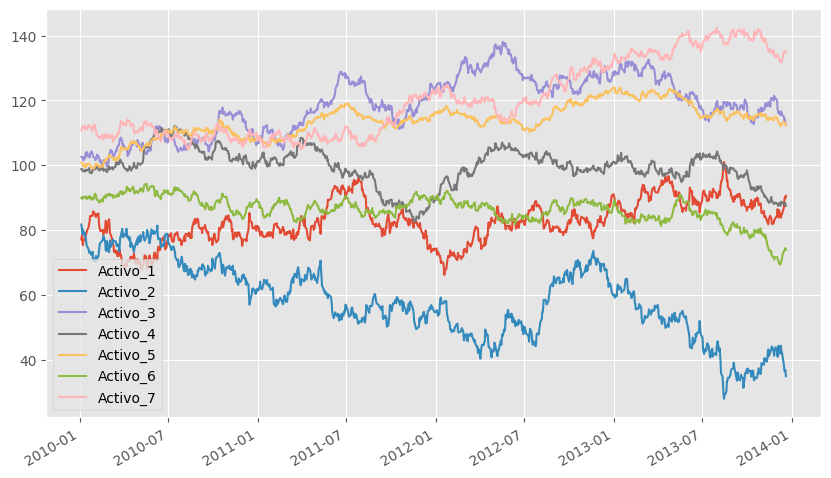

In [43]:
precios_df.plot(figsize=(10, 6))

In [44]:
ret_df = np.log(precios_df).diff().dropna()

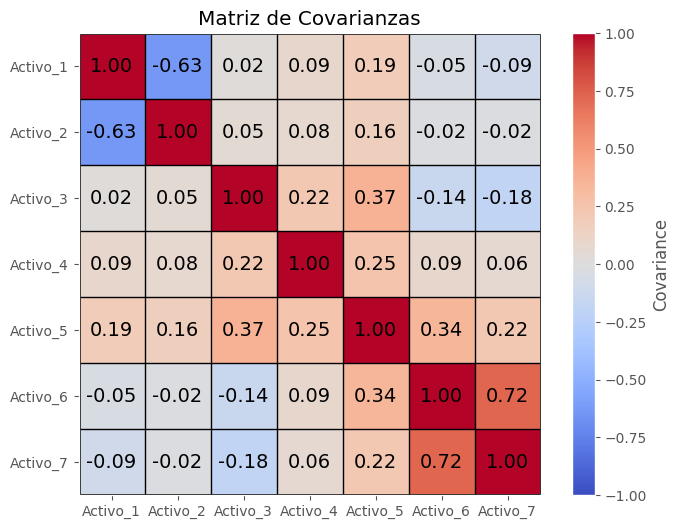

0

In [45]:
mat_corr = ret_df.corr()

dibuja_covar(mat_corr)

In [49]:
def calc_ret_cartera(w1, w2, r1, r2):
    return w1 * r1 + w2 * r2

def calc_std_cartera(w1, w2, std1, std2, rho):
    return np.sqrt(w1**2 * std1**2 + w2**2 * std2**2 + 2 * w1 * w2 * std1 * std2 * rho)

In [47]:
ret1 = ret_df.iloc[:, 0].mean()
ret2 = ret_df.iloc[:, 1].mean()

std1 = ret_df.iloc[:, 0].std()
std2 = ret_df.iloc[:, 1].std()

coef_corr = mat_corr.iloc[0, 1]


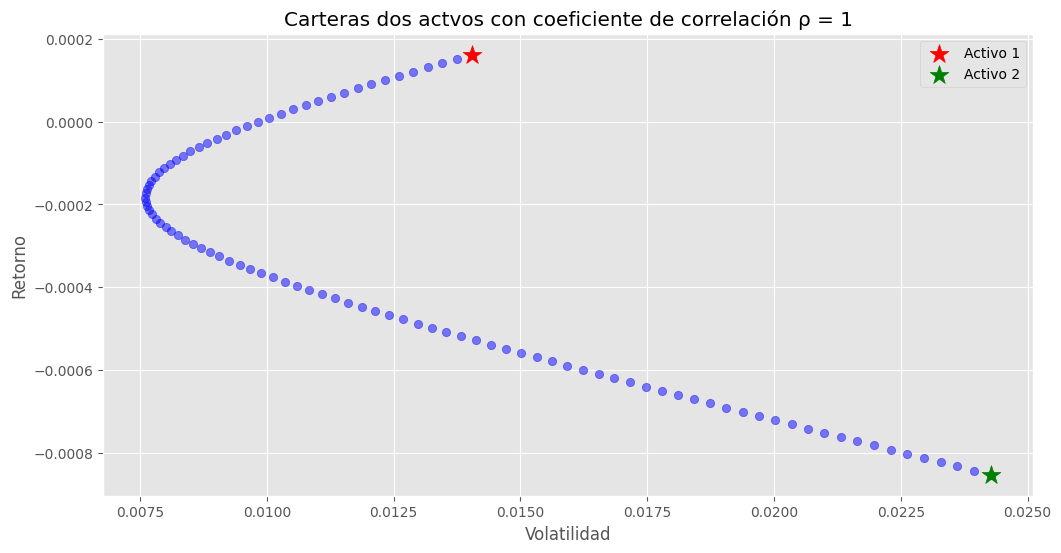

In [51]:
fig, ax = plt.subplots(figsize=(12, 6))

x = np.linspace(0, 1, 101) #generamos 101 puntos entre 0 y 1 que representan los pesos del activo 1

for i in x:
    reti = calc_ret_cartera(i, 1 - i, ret1, ret2) #calculamos el retorno de la cartera para cada peso
    stdi = calc_std_cartera(i, 1 - i, std1, std2, coef_corr) #calculamos la volatilidad de la cartera para cada peso
    plt.scatter(stdi, reti, color='blue', alpha=0.5) #marcamos el resto de puntos

plt.scatter(std1, ret1, color='red', marker='*', s=200, label='Activo 1') #marcamos el punto del activo 1
plt.scatter(std2, ret2, color='green', marker='*', s=200, label='Activo 2') #marcamos el punto del activo 2

plt.xlabel('Volatilidad')
plt.ylabel('Retorno')
plt.title('Carteras dos actvos con coeficiente de correlación \u03C1 = 1')
plt.legend()
plt.show()

In [53]:
activos = ret_df.iloc[:, 0:2]
activos.head(2)

,Activo_1,Activo_2
2010-01-05,0.017069,-0.015529
2010-01-06,-0.005315,-0.021200


In [93]:
pesos = np.random.uniform(0, 1, 200).reshape(-1, 2)
pesos = pesos / pesos.sum(axis=1, keepdims=True)


In [94]:
carteras = activos @ pesos.T

In [65]:
carteras.mean()

0     -0.000048
1     -0.000151
2     -0.000524
3     -0.000158
4     -0.000360
         ...   
495   -0.000744
496   -0.000343
497   -0.000475
498   -0.000435
499   -0.000328
Length: 500, dtype: float64

In [95]:
ret_med = carteras.mean()
ret_std = carteras.std()

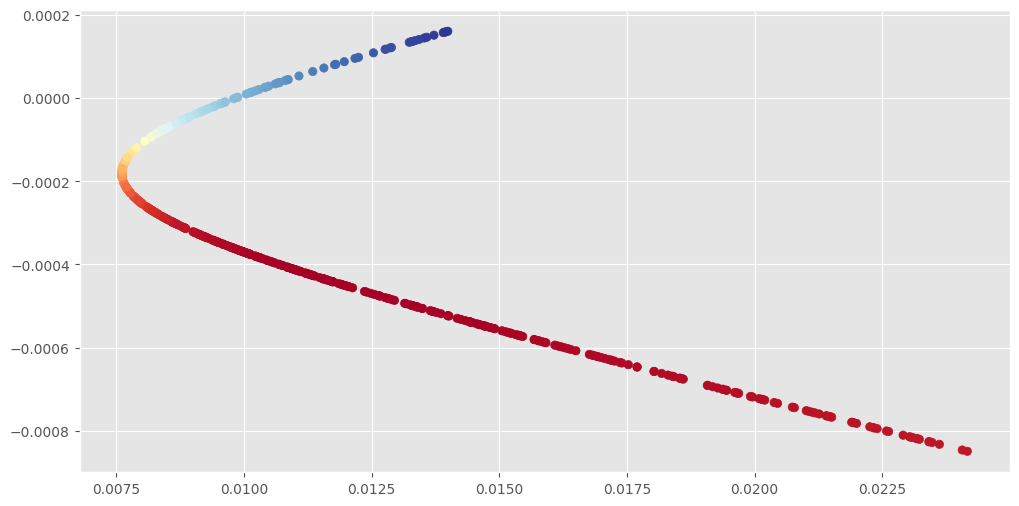

In [67]:
plt.figure(figsize=(12, 6))
plt.scatter(ret_std, ret_med, c=ret_med / ret_std, cmap='RdYlBu')

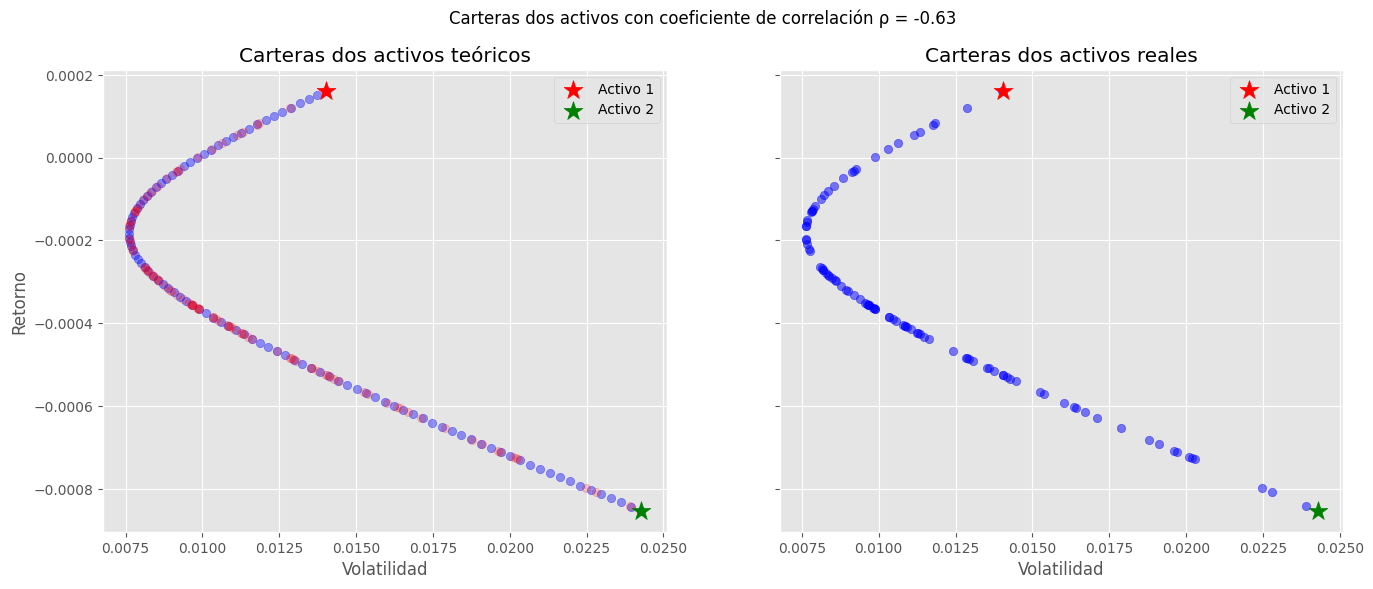

In [97]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6), sharey=True, sharex=True)

x = np.linspace(0, 1, 101) #generamos 101 puntos entre 0 y 1 que representan los pesos del activo 1

for i in x:
    reti = calc_ret_cartera(i, 1 - i, ret1, ret2) #calculamos el retorno de la cartera para cada peso
    stdi = calc_std_cartera(i, 1 - i, std1, std2, coef_corr) #calculamos la volatilidad de la cartera para cada peso
    ax[0].scatter(stdi, reti, color='blue', alpha=0.4) 
    #plt.scatter(stdi, reti, color='blue', alpha=0.5, ax=ax[0]) #marcamos el resto de puntos

ax[0].scatter(std1, ret1, color='red', marker='*', s=200, label='Activo 1') #marcamos el punto del activo 1
ax[0].scatter(std2, ret2, color='green', marker='*', s=200, label='Activo 2') #marcamos el punto del activo 2
ax[0].legend()
ax[0].set_xlabel('Volatilidad')
ax[0].set_ylabel('Retorno')
ax[0].set_title('Carteras dos activos teóricos')
ax[0].scatter(ret_std, ret_med, c='red', alpha=0.2)


#ax[1].scatter(ret_std, ret_med, c=ret_med / ret_std, cmap='RdYlBu', alpha=0.5)
ax[1].scatter(ret_std, ret_med, c='blue', alpha=0.5)
ax[1].scatter(std1, ret1, color='red', marker='*', s=200, label='Activo 1') #marcamos el punto del activo 1
ax[1].scatter(std2, ret2, color='green', marker='*', s=200, label='Activo 2') #marcamos el punto del activo 2
ax[1].legend()
ax[1].set_xlabel('Volatilidad')
ax[1].set_title('Carteras dos activos reales')
#ax[1].set_ylabel('Retorno')

fig.suptitle(f'Carteras dos activos con coeficiente de correlación \u03C1 = {coef_corr:.2f}')
#plt.legend()
plt.show()